Following the steps from https://realpython.com/beautiful-soup-web-scraper-python/#what-is-web-scraping.

# Step 1: Inspect Your Data Sourse

Example of an URL: https://www.marktplaats.nl/v/auto-s/opel/m2063743718-opel-corsa-1-2-16v-3d-2003-grijs-weinig-kilometers

...marktplaats.nl/ - the website<br>
v/ - ?<br>
auto-s/ - I will only be looking at cars so probably want this there<br>
opel/ - the car brand<br>
the last part is the actual title of the listing (see below)

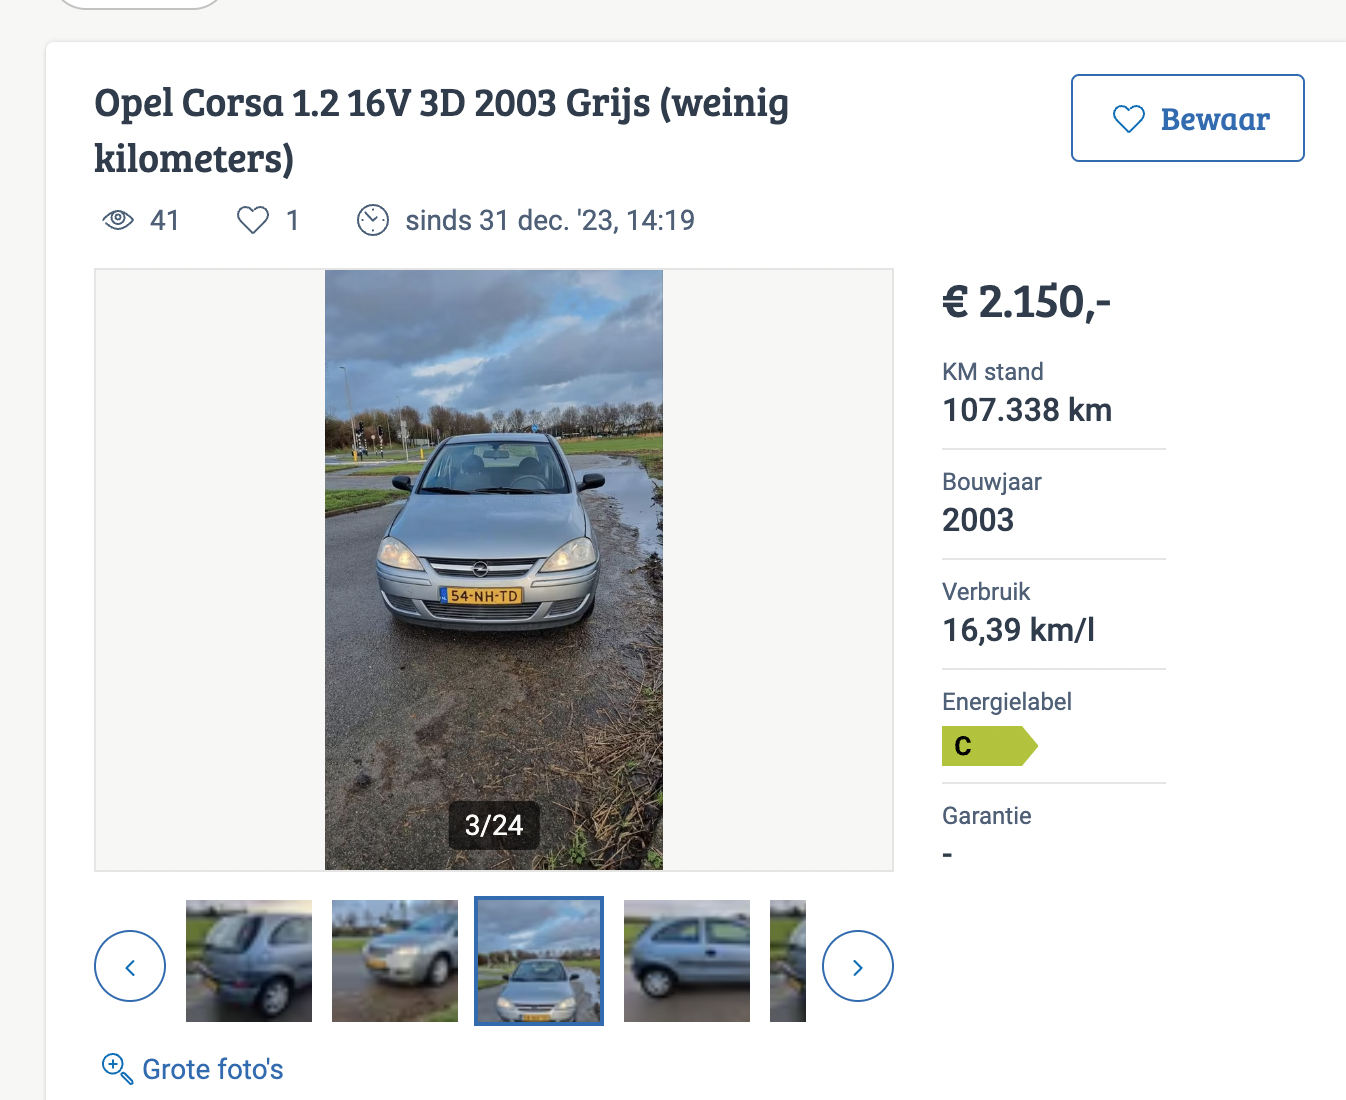

Example of an URL: https://www.marktplaats.nl/l/auto-s/#q:audi+a3|f:10882|postcode:2343DS

l/ - ?<br>
auto-s/ - looking in the cars category<br>
#q:audi+a3 - what I entered in the search<br>
f:10882 - I want to buy, not lease (f_10883 is for leasing)<br>
postcode:2343DS - it has to have a postcode, but it matters only if I enter also max distance

view-source:https://www.marktplaats.nl/v/auto-s/audi/m2062061541-audi-a3-1-8-tfsi-cabriolet-118kw-2009-grijs
        
The above allows to look at the page source, which seems easy to read through and pick out different words and features

# Step 2: Scrape HTML Content From a Page

In [8]:
import requests

URL = 'https://www.marktplaats.nl/v/auto-s/audi/m2062061541-audi-a3-1-8-tfsi-cabriolet-118kw-2009-grijs'
page = requests.get(URL)

print(page.text)

<!DOCTYPE html><html lang="nl"><head><meta charSet="utf-8"/><title>≥ Audi A3 1.8 Tfsi Cabriolet 118KW 2009 Grijs — Audi — Marktplaats</title><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="Content-Language" content="nl"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" content="Leuke Audi A3 te koop. In de tijd dat ik hem heb, heb ik genoten!Goed onderhouden. Laatste beurt nieuwe remmen + toebehoren laten vervangen. Hij rijdt"/><link rel="shortcut icon" href="//cdn.ebayclassifieds.net/bff/static/vendor/hz-web-ui/mp/favicons/favicon.53911c94.ico"/><link rel="apple-touch-icon" sizes="57x57" href="//cdn.ebayclassifieds.net/bff/static/vendor/hz-web-ui/mp/favicons/apple-touch-icon-57x57.c048cb4e.png"/><link rel="apple-touch-icon" sizes="114x114" href="//cdn.ebayclassifieds.net/bff/static/vendor/hz-web-ui/mp/favicons/apple-touch-icon-114x114.ea366763.png"/><link rel="apple-touch-icon" sizes="72x72" href="//cdn.ebayclassifie

In [9]:
print(page.content)

b'<!DOCTYPE html><html lang="nl"><head><meta charSet="utf-8"/><title>\xe2\x89\xa5 Audi A3 1.8 Tfsi Cabriolet 118KW 2009 Grijs \xe2\x80\x94 Audi \xe2\x80\x94 Marktplaats</title><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="Content-Language" content="nl"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" content="Leuke Audi A3 te koop. In de tijd dat ik hem heb, heb ik genoten!Goed onderhouden. Laatste beurt nieuwe remmen + toebehoren laten vervangen. Hij rijdt"/><link rel="shortcut icon" href="//cdn.ebayclassifieds.net/bff/static/vendor/hz-web-ui/mp/favicons/favicon.53911c94.ico"/><link rel="apple-touch-icon" sizes="57x57" href="//cdn.ebayclassifieds.net/bff/static/vendor/hz-web-ui/mp/favicons/apple-touch-icon-57x57.c048cb4e.png"/><link rel="apple-touch-icon" sizes="114x114" href="//cdn.ebayclassifieds.net/bff/static/vendor/hz-web-ui/mp/favicons/apple-touch-icon-114x114.ea366763.png"/><link rel="apple-touch-icon" size

In [10]:
print(type(page))

<class 'requests.models.Response'>


In [11]:
print(type(page.text))

<class 'str'>


In [12]:
print(type(page.content))

<class 'bytes'>


# Parse HTML Code With Beautiful Soup

In [13]:
from bs4 import BeautifulSoup

URL = 'https://www.marktplaats.nl/l/auto-s/opel/p/2/#f:10882|postcode:2343DS'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [14]:
soup

<!DOCTYPE html>
<html lang="nl"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="app-id=373963365, app-argument=marktplaats://search/execute?categoryId=138&amp;utm_source=smartbanner&amp;utm_medium=smartbanner&amp;utm_content=smartbanner&amp;utm_campaign=smartbanner" name="apple-itunes-app"/><title>≥ Occasions en nieuwe Opel Auto's op Marktplaats | Pagina 2</title><meta content="Koop en verkoop je tweedehands, jong gebruikte of nieuwe Opel Auto op Marktplaats: de grootste advertentiesite van Nederland. | pagina 2" name="description"/><meta content="index, follow" name="robots"/><meta content="1704545050953" name="generation-time-millis"/><link href="https://www.marktplaats.nl/l/auto-s/opel/p/2/" rel="canonical"/><script type="application/ld+json">{"@context":"https:\u002F\u002Fschema.org","@type":"BreadcrumbList","itemListElement":[{"@type":"ListItem","position":1,"name":"Marktplaats","item":"https:\u002F\u002Fwww.marktpla

In [17]:
results = soup.find(id = "__next")

In [18]:
print(results.prettify())

<div id="__next">
 <header class="u-stickyHeader" style="height:122px">
  <div class="hz-Header">
   <div class="hz-Header-ribbonTop">
   </div>
   <div class="hz-Header-navBar hz-Header-bigger-touchAreas">
    <div class="hz-Header-maxWidth">
     <a class="hz-Link hz-Link--isolated hz-Header-logo" data-role="homepage" href="/">
      <i aria-hidden="true" class="hz-Asset hz-Asset--fluid hz-SvgAsset hz-SvgAssetTenant hz-SvgAssetTenant--nlnl" data-sem="Asset">
      </i>
      <i aria-hidden="true" class="hz-Asset hz-Asset--square hz-SvgAsset hz-SvgAssetTenantCoin hz-SvgAssetTenantCoin--nlnl" data-sem="Asset">
      </i>
     </a>
     <ul class="hz-Header-links">
      <li>
       <a class="hz-Link hz-Link--isolated" href="https://help.marktplaats.nl/s/">
        Help en info
       </a>
      </li>
      <li>
       <a class="hz-Link hz-Link--isolated" href="https://www.marktplaats.nl/i/help/over-marktplaats/voorwaarden-en-privacybeleid/algemene-gebruiksvoorwaarden.dot.html">
       

In [24]:
elements = results.find_all("li", class_ = "hz-Listing hz-Listing--list-item-cars hz-Listing--list-item-cars-BNL16952")
for element in elements:
    print(element, end = "\n"*2)

<li class="hz-Listing hz-Listing--list-item-cars hz-Listing--list-item-cars-BNL16952"><a class="hz-Link hz-Link--block hz-Listing-coverLink" data-tracking="PjoS5vozTliQPfI3yVx_4ksqex3lW0CzM9Aa4Z1YgiE9cDJVuknmSMOMIh3F9YVc_jIqcU3EwV3zD09Wp-_w4WX5aUkw6PwxgfTN4EYdVEbe5IKMKYRjuhnokokVvzGrybOdYXUA-Xu3H8pkS6a4lhZwtSEoOyB5tPy_V11my6yVKuua53UWQTZSCF0I8LM9dbrjagpqEREogntEYZpFArypWV5Tc0X0jIl_pydcgVpOVq9QGGjTy79mAZivvEUAtUEwSXCyZxQDW1G4DSzCoxbVMK5BUUIn6px_Yti5dl-9gy3x-DVogh1_FZH7MTYC-XCdlNm7Xq9EQBYgNuFhKrGf1T0t95UdRjPavwibFWNX-hAT_0RXh0FNf61m1OxXp4PhivaF_a0E7F2NBJSA74Fq3c-pkrV_Vqfl-IEspwuH7TPKLDotzyD7HPlOkcr8qJ4xeaXUIexetJW0swSU2bhhc3H2C7jGxunympQiqenHV3S2olVm1NaseR9vbBexgEG66_iFEm1XKLfJoZ32RUj-LOD6h5PcFFtD5DESnMi_fRnc_Uzp6sRPsV8i7CbGDv-6e-HfQnSjTIs0xhjeEHjqtm2ToqE9N7u5TS36Bvs" href="/v/auto-s/opel/a1496602805-opel-grandland-1-2-turbo-business-executive-automaat-nr-041"><div class="hz-Listing-image"><figure class="hz-Listing-image-container"><div class="hz-Listing-image-item hz-Listing-image-item-

In [26]:
print(len(elements))

34


In [103]:
titles = []
yr_construction = []
fuel = []
transmission = []
vehicle_type = []
mileage = []
for element in elements:
    title_element = element.find("h3", class_ = "hz-Listing-title hz-Text hz-Text--bodyLargeStrong")
    titles.append(title_element.text)
    
    attributes_element = element.find_all("span", class_ = "hz-Attribute hz-Attribute--default")
    for a in attributes_element:
        attribute = a.find_all("i")[0].get("class")[-1]
        print(attribute)
        if 'Year' in attribute:
            yr_construction.append(a.text)
        elif 'Fuel' in attribute:
            fuel.append(a.text)
        elif 'Transmission' in attribute:
            transmission.append(a.text)
        elif 'Body' in attribute:
            vehicle_type.append(a.text)
        elif 'Mileage' in attribute:
            mileage.append(a.text)

hz-SvgIconCarConstructionYear
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarBody
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarBody
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarBody
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarBody
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarBody
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgIconCarFuel
hz-SvgIconCarTransmission
hz-SvgIconCarBody
hz-SvgIconCarConstructionYear
hz-SvgIconCarMileage
hz-SvgI

In [101]:
print(len(titles))
print(len(yr_construction))
print(len(fuel))
print(len(transmission))
print(len(vehicle_type))
print(len(mileage))

34
34
34
34
30
32


In [95]:
import pandas as pd
page_df = pd.DataFrame({'title':titles, 'year of construction':yr_construction, 'fuel':fuel, 'shifting':transmission, 'vehicle type':vehicle_type})

ValueError: All arrays must be of the same length

In [96]:
page_df

,title,year of construction,fuel,shifting,vehicle type
0,Opel Grandland 1.2 TURBO BUSINESS EXECUTIVE AU...,2018,Benzine,Automaat,SUV of Terreinwagen
1,Opel Vivaro Bestelbus L1 H1 2019 Diesel Handge...,2019,147.216 km,Diesel,Handgeschakeld
2,Opel Vivaro Dubbel cabine L3 H1 2021 Diesel Ha...,2021,94.624 km,Diesel,Handgeschakeld
3,Opel Vivaro Bestelbus L2 H1 2018 Diesel Handge...,2018,169.184 km,Diesel,Handgeschakeld
4,Opel Vectra Wagon 2.2-16V Comfort airco trekha...,2005,226.106 km,Benzine,Handgeschakeld
5,Opel Corsa 1.2-16V Design Edition | Airco | LM...,2013,82.416 km,Benzine,Handgeschakeld
6,Opel Zafira 2.2 Temptation PANO/7PERSOONS/NL A...,2007,133.192 km,Benzine,Handgeschakeld
7,Opel Insignia Sports Tourer 2.0 CDTI EcoFLEX B...,2013,228.610 km,Diesel,Handgeschakeld
8,Opel Astra Sports Tourer 1.0 Turbo 120 Jaar Ed...,2019,106.269 km,Benzine,Handgeschakeld
9,Opel Ampera-e Business Executive 60 KWH Automa...,2018,106.966 km,Elektrisch,Automaat


Pages inspection

In [53]:
results.find_all("div", class_ = "hz-PaginationControls hz-PaginationControls--new")

[<div class="hz-PaginationControls hz-PaginationControls--new"><nav class="hz-PaginationControls-pagination"><a class="hz-Link hz-Link--isolated hz-Button hz-Button--primary" href="/l/auto-s/opel/"><i aria-hidden="true" class="hz-Icon hz-Icon--textPrimaryInverse hz-SvgIcon hz-SvgIconArrowLeft" data-sem="Icon"></i></a><span class="hz-PaginationControls-pagination-pageList"><a class="hz-Link hz-Link--isolated" href="/l/auto-s/opel/">1</a><span>2</span><a class="hz-Link hz-Link--isolated" href="/l/auto-s/opel/p/3/">3</a></span><span class="hz-PaginationControls-pagination-amountOfPages">Pagina 2 van 3</span><a class="hz-Link hz-Link--isolated hz-Button hz-Button--primary" href="/l/auto-s/opel/p/3/"><i aria-hidden="true" class="hz-Icon hz-Icon--textPrimaryInverse hz-SvgIcon hz-SvgIconArrowRight" data-sem="Icon"></i></a></nav></div>]

In [56]:
print(results.find_all("span", class_ = "hz-PaginationControls-pagination-pageList")[0])

<span class="hz-PaginationControls-pagination-pageList"><a class="hz-Link hz-Link--isolated" href="/l/auto-s/opel/">1</a><span>2</span><a class="hz-Link hz-Link--isolated" href="/l/auto-s/opel/p/3/">3</a></span>


In [57]:
results.find_all("span", class_ = "hz-PaginationControls-pagination-amountOfPages")

[<span class="hz-PaginationControls-pagination-amountOfPages">Pagina 2 van 3</span>]